#**Atividade 1**: implementação do KNN

Nesta atividade, você vai implementar seu próprio classificador de aprendizado supervisionado utilizando o algoritmo K-Nearest Neighbors (KNN), seguindo o estilo da biblioteca scikit-learn. Ao final, você deverá testar sua implementação em um conjunto de dados, comparar os resultados com a implementação padrão do scikit-learn e discutir os resultados.

- Objetivos:
  - Entendimento prático dos conceitos de classificação supervisionada.
  - Familiarização com a programação orientada a objetos e o desenvolvimento de algoritmos de machine learning do zero.
  - Comparação de desempenho entre diferentes métricas de distância no KNN.

- Instruções:

  Você deverá implementar a classe **KNNClassifier**, que seguirá o estilo da biblioteca scikit-learn. A implementação deverá permitir a seleção de diferentes métricas de distância e comparar os resultados obtidos com a versão da biblioteca scikit-learn.

  - Requisitos obrigatórios:
    1. Programação Orientada a Objetos:
      - A implementação deve seguir os princípios da programação orientada a objetos.
    2. Interface do classificador:
      - A classe deve ter os seguintes métodos
        - fit(X, y): Treina o classificador nos dados de treinamento X (matriz de features) e seus respectivos rótulos y (vetor de rótulos).
        - predict(X): Prediz as classes para um conjunto de dados X.
        - score(X, y): Retorna a acurácia da predição em relação aos rótulos reais y.
    3. Seleção da métrica de distância
      - O usuário deve poder escolher a métrica de distância a ser usada no classificador.
        - Implemente pelo menos duas das seguintes métricas: Distância Euclidiana, Distância Manhattan, Distância Minkowski ou Distância Ponderada.
    4. Teste e análise:
      - Teste sua implementação com um conjunto de dados real
      - Compare os resultados de acurácia entre sua implementação e a do scikit-learn.
      - Verifique se há diferenças no desempenho ao utilizar diferentes métricas de distância. Explique por que certas métricas podem ser mais adequadas para alguns tipos de dados.
    5. Exploração de parâmetros:
      - Permita que o usuário ajuste o número de vizinhos (k) a serem considerados no KNN.
      - Teste o impacto de valores diferentes de k no desempenho do modelo.
      - Discuta como o valor de k influencia os resultados do classificador e qual foi o melhor valor para o conjunto de dados escolhido.
  - Requisitos opcionais (bônus):
    1. Cross-Validation:
      - Implemente um método para realizar validação cruzada (k-fold cross-validation) e verificar a estabilidade do modelo com diferentes partições dos dados.
    2. Gráficos e visualizações:
      - Gere gráficos mostrando como o desempenho do KNN varia com diferentes valores de k
    3. Comparação com outras métricas de avaliação:
      - Além da acurácia, implemente outras métricas de avaliação, como precisão, recall e f1-score, e discuta o desempenho do modelo com base nessas métricas.



## Importação de bibliotecas



In [8]:
import numpy as np
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Classe KNNClassifier (Custom)

In [16]:
class KNNClassifier:
    def __init__(self, k=3, metrica='euclidean'):
        self.k = k
        self.metrica = metrica

    def fit(self, X, y):
        #Treinamento
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _distance(self, x1, x2):
        # Cálculo da distância de acordo com a métrica
        if self.metrica == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metrica == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.metrica == 'minkowski':
            p = 3  # parâmetro da distância de Minkowski -  se o usuário quiser, pode alterar
            return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)
        else:
            raise ValueError(f"Unknown distance metric: {self.metrica}")

    def predict(self, X):
        # Predição
        X = np.array(X)
        PredictionErrorDisplay = []

        for x_test in X:
            dists = [self._distance(x_test, x_train) for x_train in self.X_train]
            k_idx = np.argsort(dists)[:self.k]
            k_nearest_lbls = [self.y_train[i] for i in k_idx]
            most_common = Counter(k_nearest_lbls).most_common(1)
            PredictionErrorDisplay.append(most_common[0][0])

        return np.array(PredictionErrorDisplay)

    def score(self, X, y):
        #Acurácia
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Validação Cruzada K-Fold

In [11]:
# Validação cruzada K-FOLD
def kFold_crossVal(model, X, y, k_folds=5):
    fold_size = len(X) // k_folds
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for fold in range(k_folds):
        test_idx = indices[fold*fold_size:(fold+1)*fold_size]
        train_idx = np.setdiff1d(indices, test_idx)

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(np.mean(y_pred == y_test))
        precisions.append(precision_score(y_test, y_pred, average='macro'))
        recalls.append(recall_score(y_test, y_pred, average='macro'))
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    return {
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1_score': np.mean(f1_scores),
        'accuracy_std': np.std(accuracies)
    }

# Plot comparativo

In [18]:
# Plot de comparação entre os métodos, parâmetros e métricas
def plot_compara(X, y, metricas, max_k=20, k_folds=5):
    k_values = list(range(1, max_k+1))

    custom_results = {metrica: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for metrica in metricas}
    sklearn_results = {metrica: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for metrica in metricas}

    for metrica in metricas:
        for k in k_values:
            # KNN Customizado
            knn_custom = KNNClassifier(k=k, metrica=metrica)
            custom_scores = kFold_crossVal(knn_custom, X, y, k_folds)
            custom_results[metrica]['accuracy'].append(custom_scores['accuracy'])
            custom_results[metrica]['precision'].append(custom_scores['precision'])
            custom_results[metrica]['recall'].append(custom_scores['recall'])
            custom_results[metrica]['f1_score'].append(custom_scores['f1_score'])

            # KNN sklearn
            knn_sklearn = KNeighborsClassifier(n_neighbors=k, metric=metrica if metrica != 'minkowski' else 'minkowski', p=3 if metrica == 'minkowski' else 2)
            sklearn_accuracy = np.mean(cross_val_score(knn_sklearn, X, y, cv=k_folds))
            knn_sklearn.fit(X, y)
            y_pred_sklearn = knn_sklearn.predict(X)
            sklearn_results[metrica]['accuracy'].append(sklearn_accuracy)
            sklearn_results[metrica]['precision'].append(precision_score(y, y_pred_sklearn, average='macro'))
            sklearn_results[metrica]['recall'].append(recall_score(y, y_pred_sklearn, average='macro'))
            sklearn_results[metrica]['f1_score'].append(f1_score(y, y_pred_sklearn, average='macro'))

    # Plotando os resultados para cada métrica de distância
    for metrica in metricas:
        plt.figure(figsize=(12, 8))
        plt.suptitle(f"Comparação: KNN Custom x KNN sklearn - {metrica.capitalize()}")

        # Plot para acurácia
        plt.subplot(2, 2, 1)
        plt.plot(k_values, custom_results[metrica]['accuracy'], label='KNN Custom', marker='o')
        plt.plot(k_values, sklearn_results[metrica]['accuracy'], label='KNN sklearn', marker='x')
        plt.title('Acurácia')
        plt.xlabel('k')
        plt.ylabel('Acurácia')
        plt.legend()
        plt.grid(True)

        # Plot para precisão
        plt.subplot(2, 2, 2)
        plt.plot(k_values, custom_results[metrica]['precision'], label='KNN Custom', marker='o')
        plt.plot(k_values, sklearn_results[metrica]['precision'], label='KNN sklearn', marker='x')
        plt.title('Precisão')
        plt.xlabel('k')
        plt.ylabel('Precisão')
        plt.legend()
        plt.grid(True)

        # Plot para recall
        plt.subplot(2, 2, 3)
        plt.plot(k_values, custom_results[metrica]['recall'], label='KNN Custom', marker='o')
        plt.plot(k_values, sklearn_results[metrica]['recall'], label='KNN sklearn', marker='x')
        plt.title('Recall')
        plt.xlabel('k')
        plt.ylabel('Recall')
        plt.legend()
        plt.grid(True)

        # Plot para f1-score
        plt.subplot(2, 2, 4)
        plt.plot(k_values, custom_results[metrica]['f1_score'], label='KNN Custom', marker='o')
        plt.plot(k_values, sklearn_results[metrica]['f1_score'], label='KNN sklearn', marker='x')
        plt.title('F1-Score')
        plt.xlabel('k')
        plt.ylabel('F1-Score')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# Main

Comparando KNN Custom com sklearn KNN para diferentes métricas de distância


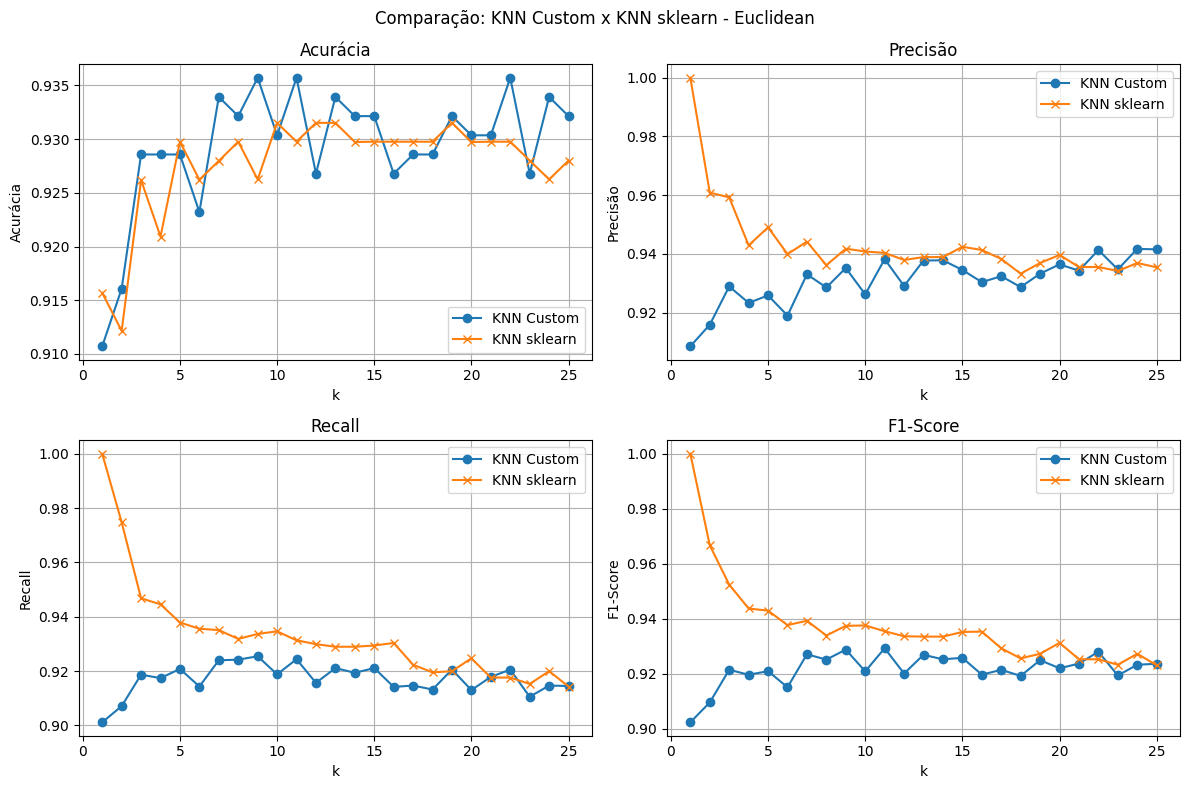

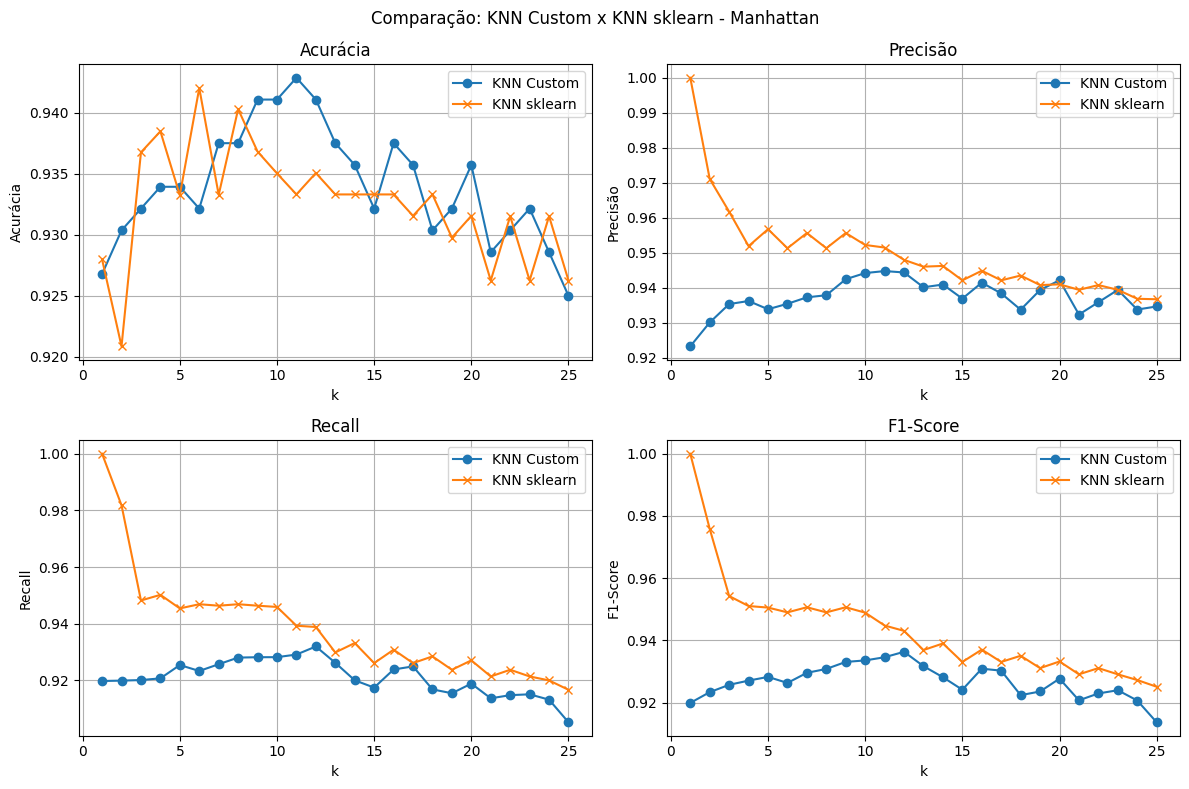

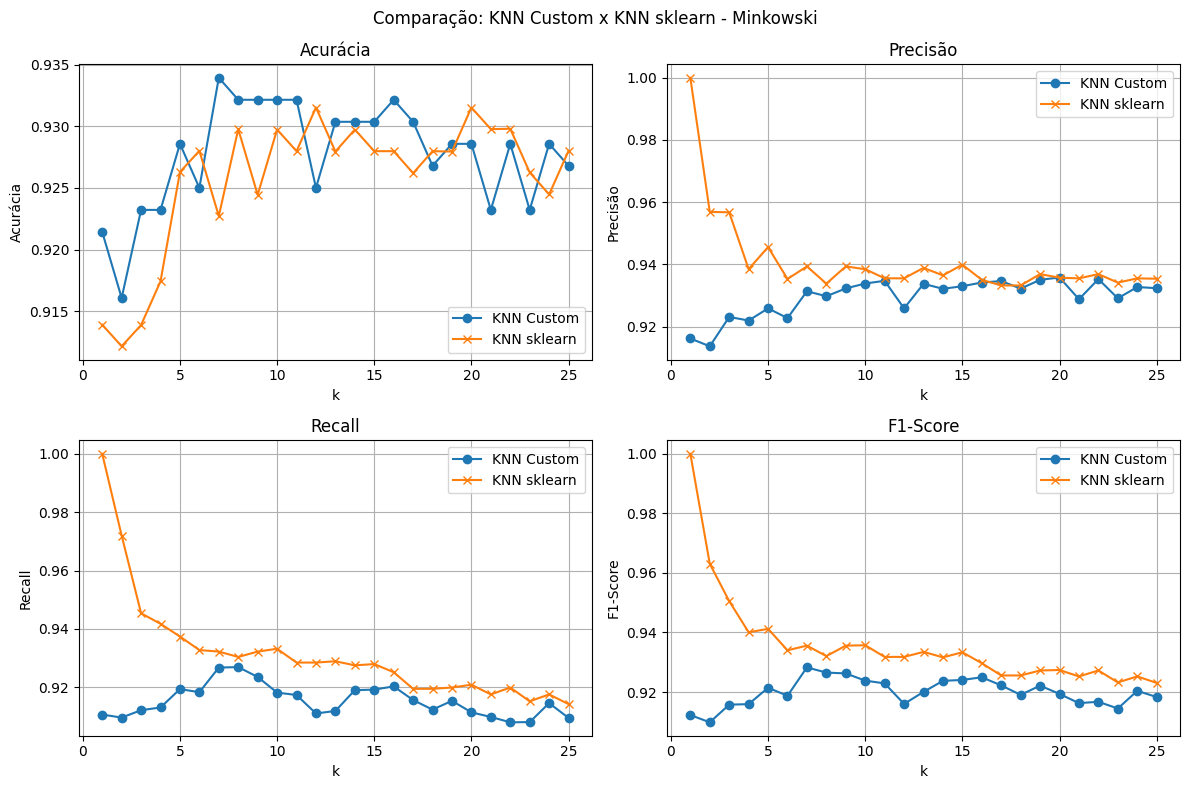

In [19]:
from sklearn.datasets import load_breast_cancer

if __name__ == "__main__":
    # Carregar o conjunto de dados Breast Cancer
    data = load_breast_cancer()
    X = data['data']
    y = data['target']

    # Métricas de distância
    metricas = ['euclidean', 'manhattan', 'minkowski']

    print("Comparando KNN Custom com sklearn KNN para diferentes métricas de distância")
    plot_compara(X, y, metricas, max_k=25, k_folds=10)

O conjunto de dados escolhido foi o Breast Cancer, com as seguintes features:

'mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'

 E os targets:

 'malignant' 'benign'


# Discussão

## Métricas de distância:

Algumas métricas podem ser mais adequadas para alguns tipos de dados pois existem diversos tipos de conjuntos dados, com diferentes distâncias entre seus elementos.

**Euclidiana**: A distância euclidiana é uma das métricas mais populares em problemas de classificação, medindo "distância reta" entre dois pontos no espaço.
É uma boa métrica para dados contínuos com relação espacial ou linear entre características.


**Manhattan**:  A distância Manhattan é a soma das diferenças absolutas entre as coordenadas de dois pontos. Ao contrário da euclidiana, ela não leva em conta a diagonal, apenas as distâncias horizontais e verticais. É adequada para dados com características independentes ou quando há presença de outliers, já que é menos sensível a grandes diferenças individuais do que a distância euclidiana.


**Minkowski**: Adequada para problemas com outliers significativos ou onde se deseja amplificar diferenças grandes nas características, já que é uma generalização que engloba tanto a distância euclidiana (quando p=2) quanto a distância Manhattan (quando p=1).

No conjunto de dados testado, a métrica Manhattan funcionou melhor, mas no geral, todas métricas performaram bem.

## Impacto do valor de k

O valor de k no algoritm KNN define o número de vizinhos mais próximos que serão considerados para classificar um dado ponto.

Valores baixos de k proporcionam uma classificação mais detalhada, mas podem ser mais propensos a erros causados por outliers.

Valores altos de k proporcionam uma fronteira de decisão mais suave, o que pode ser benéfico para dados ruidosos ou quando há sobreposição entre classes, mas podem reduzir a capacidade de capturar variações significativas.

No conjunto de dados testado, valores de k entre 7 e 12 funcionaram melhor, mas no geral, a performance foi positiva, revelando que o modelo se adaptou bem ao conjunto de dados em diferentes cenários, de acordo com as variações de k.

